# Testing Conditional Diffusion Model for Metasurfaces

This notebook demonstrates the process of:
1. **Loading trained model** - conditional diffusion model
2. **Generating samples** - creating new metasurfaces
3. **Quality analysis** - computing MPE loss for each sample
4. **Selecting best sample** - based on minimum loss
5. **Visualizing results** - plots and 2D representations

In [2]:
from pathlib import Path
import torch
from diffusion_model.conditional_network.conditional_model import Diffusion_model
from diffusion_model.conditional_network.conditional_decoder import Decoder_conditional_diffusion_vector

## Model Parameter Configuration

Here we configure the main parameters for working with the model:
- **model_number = 38**: number of model to load (best version)
- **number_of_denoising_steps = 1000**: number of denoising steps
- **model_path**: path to the trained model folder

In [3]:
model_number = 38
number_of_denoising_steps = 1000
model_path = Path('/workspace/diffusion_model/Conditional_Model_16_2_4e-6_11000_20000')


model = Diffusion_model(milestone = model_number, 
                        use_film = True,    # Use FiLM layers for conditional input
                        results_folder = model_path, 
                        timesteps = number_of_denoising_steps
                        )

## Sample Generation and Analysis

In this block we:
1. **Generate samples** using the trained model
2. **Decode each sample** into physical parameters
3. **Compute MPE loss** for each sample
4. **Save results** for further analysis

### Conditional Vector for Sampling
This is the target DSCS spectrum that the model attempts to reproduce.

In [ ]:
losses = []
relative_geometry_vectors = []

sample_set_size = 3
batch_size_to_sample = 1

# Conditional vector for sampling (target DSCS spectrum)
conditional_vector_for_sampling = [0.2440047233652012,0.13373316545853187,0.02634935177036332,0.01681613001080275,0.014719126871156401,0.004718059458417722,0.021446479244308474,0.027422508550410247,0.05498299796079197,0.8492591641224932]

# Sample generation loop
for i in range(sample_set_size):
    print(f"Generation, {i+1}/{sample_set_size} sample...")
    print("=" * 50)

    # Generate new vector using diffusion model
    vector_to_decode = model.__sample__(batch_size = batch_size_to_sample, 
                                        conditional_vec = torch.tensor([conditional_vector_for_sampling])
                                        )
    
    # Create decoder to transform vector into physical parameters
    decoder = Decoder_conditional_diffusion_vector(vector_to_decode, 
                                                   angles = [10, 20, 40, 60, 70, 80, 100, 120, 140, 160], # angles at which DSCS values are specified as conditioning vector
                                                   number_of_cells = 2, # number of cells in the metasurface
                                                   side_length = 10, # side length of the metasurface
                                                   reflective_index = 2, # reflective index of the metasurface's spheres
                                                   vacuum_wavelength = 1, # vacuum wavelength
                                                   conditional_dscs_surface=conditional_vector_for_sampling # conditioning vector of DSCS values 
                                                   )

    # Compute physical surface and DSCS spectrum
    print("Computing physical surface...")            
    dscs_surface = decoder.compute_sphere_surface()

    # Compute MPE loss (Mean Percentage Error)
    loss = decoder.compute_loss()

    # Store results for analysis
    relative_geometry_vectors.append(vector_to_decode)
    losses.append(loss)

    print(f"MPE value: {loss}")
    print(f"Relative geometry vector: {vector_to_decode}")

Generation, 1/3 sample...
loading from version 2.1.1


sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

Computing physical surface...
Evaluating scattered field plane wave expansion in layer number 1 ...
Scatt. field pwe          : 100%|██████████| elapsed: 00:00 remaining: 00:00
Evaluating scattered field plane wave expansion in layer number 0 ...
Scatt. field pwe          : 100%|██████████| elapsed: 00:00 remaining: 00:00
MPE value: 42.30018058281651
Relative geometry vector: tensor([[[2.5260e-01, 2.5471e-01, 3.0981e-01, 1.8644e-01, 7.1245e-01,
          8.8595e-01, 7.3273e-01, 5.6243e-01, 3.7522e-01, 9.8508e-01,
          1.4349e-01, 9.9048e-01, 2.2178e-03, 7.2965e-04, 0.0000e+00,
          1.0306e-04]]])
Generation, 2/3 sample...
loading from version 2.1.1


sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

Computing physical surface...
Evaluating scattered field plane wave expansion in layer number 1 ...
Scatt. field pwe          : 100%|██████████| elapsed: 00:00 remaining: 00:00
Evaluating scattered field plane wave expansion in layer number 0 ...
Scatt. field pwe          : 100%|██████████| elapsed: 00:00 remaining: 00:00
MPE value: 2.506859232345107
Relative geometry vector: tensor([[[9.6698e-01, 5.7336e-01, 5.5995e-01, 1.0000e+00, 3.2404e-01,
          6.1228e-01, 8.8963e-01, 4.2554e-01, 8.6203e-01, 9.8126e-01,
          5.0537e-01, 7.3688e-01, 2.4739e-02, 2.5719e-05, 1.4434e-02,
          1.3553e-02]]])
Generation, 3/3 sample...
loading from version 2.1.1


sampling loop time step:   0%|          | 0/1000 [00:00<?, ?it/s]

Computing physical surface...
Evaluating scattered field plane wave expansion in layer number 1 ...
Scatt. field pwe          : 100%|██████████| elapsed: 00:00 remaining: 00:00
Evaluating scattered field plane wave expansion in layer number 0 ...
Scatt. field pwe          : 100%|██████████| elapsed: 00:00 remaining: 00:00
MPE value: 2.9762306246008348
Relative geometry vector: tensor([[[0.9599, 0.7356, 0.4124, 0.7692, 0.4243, 0.8514, 0.0000, 0.5610,
          0.6544, 0.5098, 0.1987, 0.9276, 0.0013, 0.0238, 0.0531, 0.0000]]])


In [8]:
min_loss = min(losses)
min_loss_index = losses.index(min_loss)
min_loss_vector = relative_geometry_vectors[min_loss_index]

print(f"Minimum loss: {min_loss}")
print(f"Minimum loss relative geometry vector: {min_loss_vector}")


Minimum loss: 2.506859232345107
Minimum loss relative geometry vector: tensor([[[9.6698e-01, 5.7336e-01, 5.5995e-01, 1.0000e+00, 3.2404e-01,
          6.1228e-01, 8.8963e-01, 4.2554e-01, 8.6203e-01, 9.8126e-01,
          5.0537e-01, 7.3688e-01, 2.4739e-02, 2.5719e-05, 1.4434e-02,
          1.3553e-02]]])


## Creating Decoder for Best Sample

Now we create a special decoder for the sample with minimum loss
to analyze its properties in detail and visualize the results:

Evaluating scattered field plane wave expansion in layer number 1 ...
Scatt. field pwe          : 100%|██████████| elapsed: 00:00 remaining: 00:00
Evaluating scattered field plane wave expansion in layer number 0 ...
Scatt. field pwe          : 100%|██████████| elapsed: 00:00 remaining: 00:00


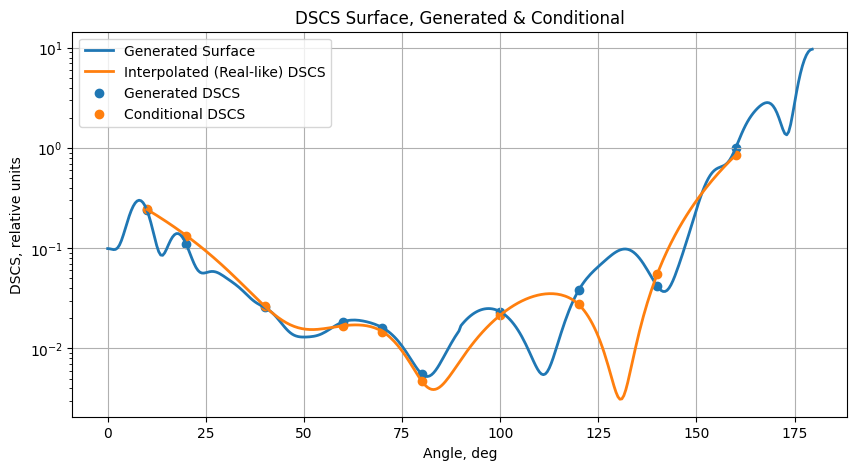

In [12]:
decoder_min_loss = Decoder_conditional_diffusion_vector(min_loss_vector, 
                                                   angles = [10, 20, 40, 60, 70, 80, 100, 120, 140, 160],
                                                   number_of_cells = 2,
                                                   side_length = 10,
                                                   reflective_index = 2,
                                                   vacuum_wavelength = 1,
                                                   conditional_dscs_surface=conditional_vector_for_sampling
                                                   )

decoder_min_loss.compute_sphere_surface()

decoder_min_loss.compute_loss()

# interpolation curve represents the possible DSCS spectrum of the metasurface which has given DSCS values on specified angles
decoder_min_loss.plot_dscs()

## Metasurface Geometry Visualization

We plot the 2D projection of sphere arrangement on the surface.
This helps understand how spheres are positioned in space.

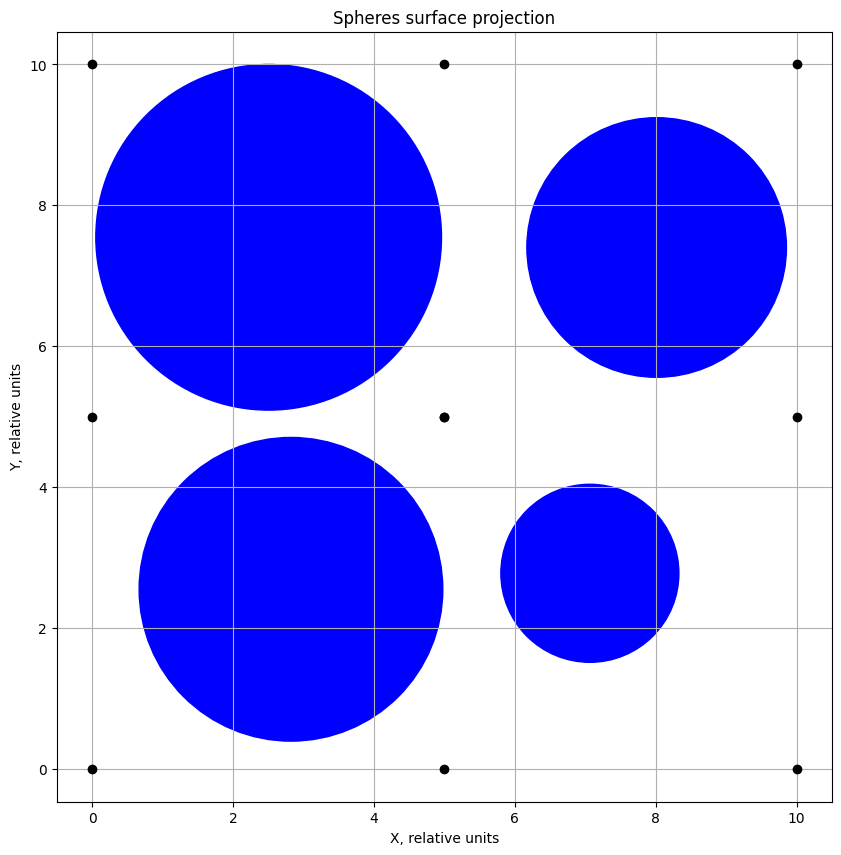

In [11]:
# save_path - path to save the plots (DSCS plot and 2D projection)
decoder_min_loss.sphere_surface.spheres_plot(save_path='/workspace/diffusion_model/sphere_surface.pdf')

## Summary

We successfully:
1. **Loaded trained model** - conditional diffusion model
2. **Generated samples** - created new metasurfaces
3. **Selected best sample** - based on minimum loss
4. **Visualized results** - created plots and 2D projections

### Generated Files:
- **dscs_surface.pdf** - DSCS spectrum plot
- **sphere_surface.pdf** - 2D metasurface projection